In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy
import torch

%matplotlib inline

In [5]:
df = pd.read_csv('../data/raw/cities.csv', index_col=['CityId'])

In [6]:
x = torch.from_numpy(df[['X', 'Y']].values)
x.div_(x.max())

tensor([[0.0621, 0.4319],
        [0.8584, 0.0660],
        [0.6774, 0.5530],
        ...,
        [0.9365, 0.6087],
        [0.5872, 0.3788],
        [0.2657, 0.6311]], dtype=torch.float64)

In [7]:
n = x.shape[0] * 8
network = torch.from_numpy(np.random.rand(n, 2))

In [8]:
iterations=10000
learning_rate=0.8

In [9]:
def get_neighborhood(center, radix, domain):
    if radix < 1:
        radix = 1
    deltas = torch.abs(center - torch.arange(domain))
    distances = torch.min(deltas, domain - deltas).double()
    return torch.exp(-(distances*distances) / (2*(radix*radix)))

In [10]:
for i in range(iterations):
    if not i % 100:
        print('\t> Iteration {}/{}'.format(i, iterations), end="\r")
    city = x[torch.randint(x.shape[0], (1,1)).item()]
    _, ind = torch.min(torch.norm(network - city, p=2, dim=1), 0)
    gaussian = get_neighborhood(ind, n//10, network.shape[0])
    network += gaussian[:,np.newaxis] * learning_rate * (city - network)
    learning_rate = learning_rate * 0.99997
    n = n * 0.9997

    if n < 1:
        print('Radius has completely decayed, finishing execution', 'at {} iterations'.format(i))
        break
    if learning_rate < 0.001:
        print('Learning rate has completely decayed, finishing execution', 'at {} iterations'.format(i))
        break
else:
    print('Completed {} iterations.'.format(iterations))

KeyboardInterrupt: 

In [ ]:
plt.plot(network.numpy())

In [288]:
def select_closest_np(candidates, origin):
    """Return the index of the closest candidate to a given point."""
    return euclidean_distance_np(candidates, origin).argmin()

def euclidean_distance_np(a, b):
    """Return the array of distances of two numpy arrays of points."""
    return np.linalg.norm(a - b, axis=1)

def get_route_np(cities, network):
    """Return the route computed by a network."""
    cities['winner'] = cities[['X', 'Y']].apply(
        lambda c: select_closest_np(network, c),
        axis=1, raw=True)

    return cities.sort_values('winner')

In [289]:
route = get_route_np(df[:1000], network.numpy())

KeyboardInterrupt: 

In [246]:
route = cities.reindex(route)

Int64Index([0, 4, 2, 3, 1], dtype='int64', name='CityId')

In [142]:
def plot_route(cities, route, name='diagram.png', ax=None):
    """Plot a graphical representation of the route obtained"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['X'], cities['Y'], color='red', s=4)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        axis.plot(route['X'], route['Y'], color='purple', linewidth=1)

        plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        plt.close()

    else:
        ax.scatter(cities['X'], cities['Y'], color='red', s=4)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        ax.plot(route['X'], route['Y'], color='purple', linewidth=1)
        return ax

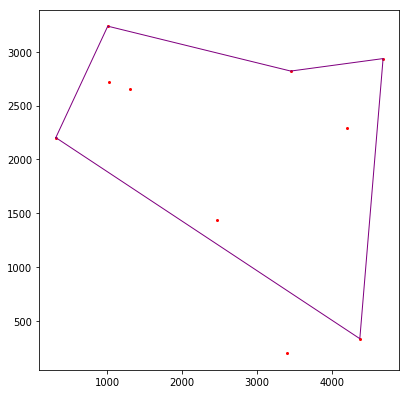

In [147]:
fig = plt.figure(figsize=(5, 5), frameon = False)
axis = fig.add_axes([0,0,1,1])

plot_route(df[:10], route, ax=axis)